# Oasis Infobyte Internship
##  Abeera Malakar
###  Sales Prediction Using Python
#### TASK-5

In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading the csv file

df=pd.read_csv('Advertising.csv')

In [3]:
#displaying random 10 datas from dataset

df.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
71,72,109.8,14.3,31.7,12.4
6,7,57.5,32.8,23.5,11.8
158,159,11.7,36.9,45.2,7.3
198,199,283.6,42.0,66.2,25.5
99,100,135.2,41.7,45.9,17.2
57,58,136.2,19.2,16.6,13.2
73,74,129.4,5.7,31.3,11.0
149,150,44.7,25.8,20.6,10.1
20,21,218.4,27.7,53.4,18.0
53,54,182.6,46.2,58.7,21.2


In [4]:
#displaying the number of rows and columns

df.shape

(200, 5)

In [5]:
#displaying the information of the csv file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#1st column is not needed so let's drop it

df=df.iloc[:,1:]

In [7]:
df.sample()

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5


In [8]:
#checking for null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#checking for null values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#statistical description

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
#removing the outlier

df=df[df['Newspaper']<=100]

In [12]:
df.shape

(198, 4)

In [13]:
#data visualtzation

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.pairplot(df,kind="reg")

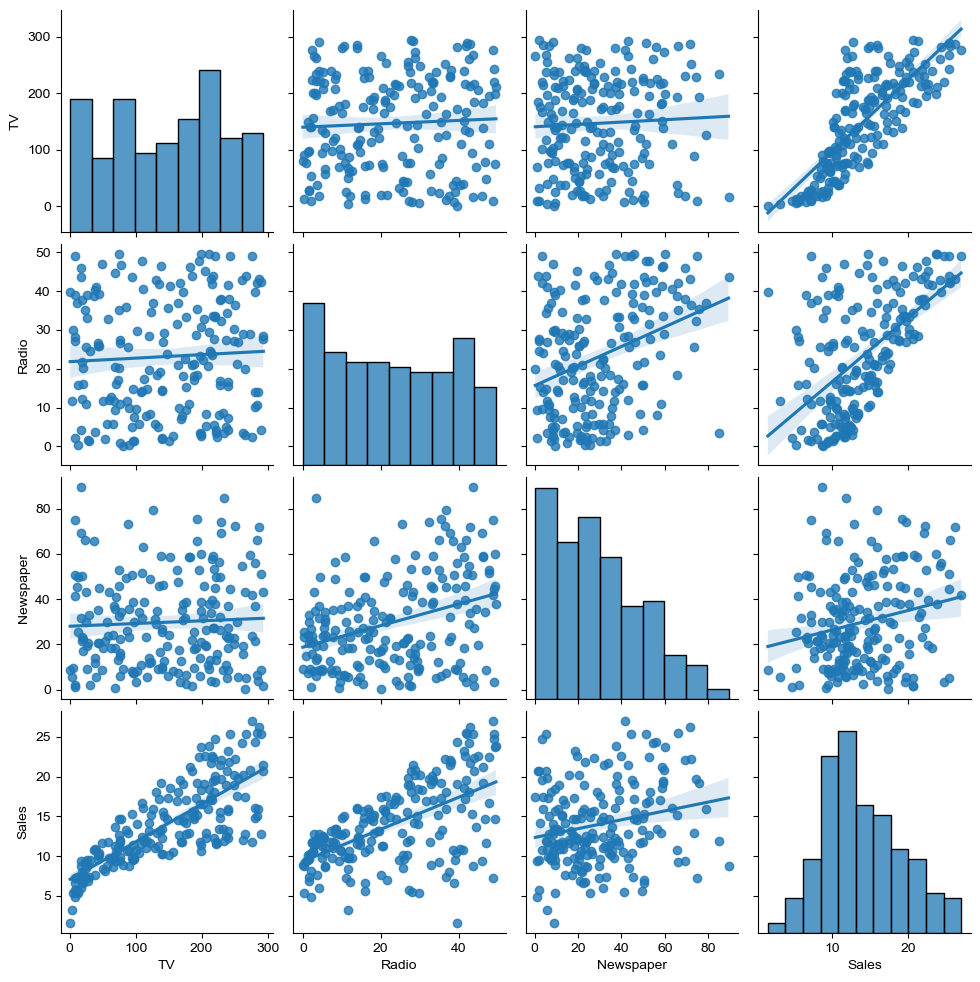

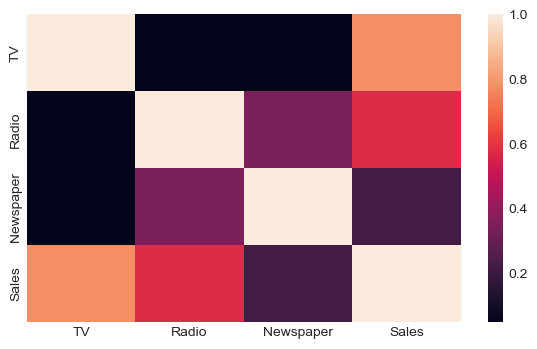

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

In [17]:
#seperating the input and output data
#x=pd.DataFrame([[df.TV,df.Radio,df.Newspaper]])

x=df.drop(columns=['Sales'])
y=df['Sales']

In [18]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [20]:
# seperating training and testing data

from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.head()

,TV,Radio,Newspaper
50,199.8,3.1,34.6
108,13.1,0.4,25.6
183,287.6,43.0,71.8
149,44.7,25.8,20.6
83,68.4,44.5,35.6


In [23]:
y_train.head()

50     11.4
108     5.3
183    26.2
149    10.1
83     13.6
Name: Sales, dtype: float64

In [24]:
#model building


from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [25]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [26]:
#Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9739652574061162

In [27]:
#checking our prediction

pipe.predict([[283.6,42.0,66.2]])

array([24.71])

In [29]:
#saving the model

import pickle
pickle.dump(pipe,open('Abeera1.pkl','wb'))

# Thank You